In [1]:
# https://www.kaggle.com/madhansing/bank-loan2

In [2]:
import pandas as pd

In [3]:
test_df = pd.read_csv("madhante.csv")
test_df.shape

(367, 12)

In [4]:
train_df = pd.read_csv("madfhantr.csv")
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train_df.shape

(614, 13)

In [6]:
train_df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [7]:
list(train_df.Credit_History.unique())

[1.0, 0.0, nan]

In [8]:
list(train_df.Dependents.unique())

['0', '1', '2', '3+', nan]

In [9]:
set(train_df.Education.unique())

{'Graduate', 'Not Graduate'}

In [10]:
set(train_df.Property_Area.unique())

{'Rural', 'Semiurban', 'Urban'}

In [11]:
# Seperate the train_y for training later
load_status_y = train_df.Loan_Status

In [12]:
train_df = train_df.drop(["Loan_ID"], axis=1)
test_df = test_df.drop(["Loan_ID"], axis=1)

In [13]:
test_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [14]:
binary_attributes = ["Gender", "Married", "Education", "Self_Employed", "Credit_History"]
categorical_attributes = ["Dependents", "Property_Area"]
numerical_attributes = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", ]

In [15]:
# For all the Binary attributes, convert them accordingly

In [16]:
train_df.Gender = train_df.Gender.replace({"Male" : 1, "Female" : 0})
train_df.Married = train_df.Married.replace({"Yes" : 1, "No" : 0})
train_df.Education = train_df.Education.replace({"Graduate" : 1, "Not Graduate" : 0})
train_df.Self_Employed = train_df.Self_Employed.replace({"Yes" : 1, "No" : 0})


test_df.Gender = test_df.Gender.replace({"Male" : 1, "Female" : 0})
test_df.Married = test_df.Married.replace({"Yes" : 1, "No" : 0})
test_df.Education = test_df.Education.replace({"Graduate" : 1, "Not Graduate" : 0})
test_df.Self_Employed = test_df.Self_Employed.replace({"Yes" : 1, "No" : 0})

train_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,Rural,Y
610,1.0,1.0,3+,1,0.0,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,Urban,Y
612,1.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,Urban,Y


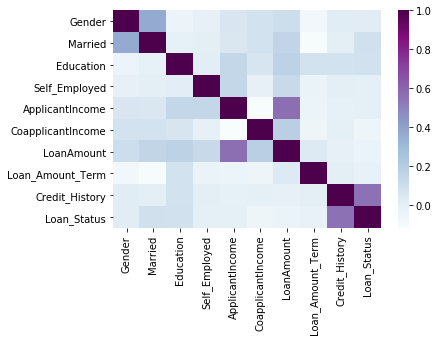

In [17]:
# Find the correlation
import seaborn as sns
# Also replace loan status
sns.heatmap(train_df.replace({"Y" : 1, "N" : 0}).corr(), cmap="BuPu")

In [18]:
train_df.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Gender,1.000000,0.369612,-0.049258,-0.009829,0.053989,0.083946,0.106947,-0.075117,0.016337
Married,0.369612,1.000000,-0.014223,0.001909,0.051332,0.077770,0.149519,-0.103810,0.004381
Education,-0.049258,-0.014223,1.000000,0.012333,0.140760,0.062290,0.171133,0.078784,0.081822
Self_Employed,-0.009829,0.001909,0.012333,1.000000,0.140826,-0.011152,0.123931,-0.037069,0.003883
ApplicantIncome,0.053989,0.051332,0.140760,0.140826,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,0.083946,0.077770,0.062290,-0.011152,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.106947,0.149519,0.171133,0.123931,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.075117,-0.103810,0.078784,-0.037069,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,0.016337,0.004381,0.081822,0.003883,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [19]:
# After checking correlation, drop Loan_Status from the dataframe
train_df = train_df.drop(["Loan_Status"], axis=1)
train_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,Rural
610,1.0,1.0,3+,1,0.0,4106,0.0,40.0,180.0,1.0,Rural
611,1.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,Urban
612,1.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,Urban


In [20]:
# # Also, add the binary attributes to categorical attributes since they have been transformed accordingly
# categorical_attributes.extend(binary_attributes)
# print(categorical_attributes)

In [21]:
numerical_attributes

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [22]:
# Create a pipeline for categorical and numerical attributes

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [24]:
# Numerical Pipeline
numerical_pipeline = Pipeline([
    ("Imputer", SimpleImputer(strategy="mean")), 
    ("Scaler", StandardScaler()),
])

In [25]:
numerical_df = pd.DataFrame(data=numerical_pipeline.fit_transform(train_df[numerical_attributes]), columns=numerical_attributes)
numerical_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.072991,-0.554487,0.000000,0.279851
1,-0.134412,-0.038732,-0.219273,0.279851
2,-0.393747,-0.554487,-0.957641,0.279851
3,-0.462062,0.251980,-0.314547,0.279851
4,0.097728,-0.554487,-0.064454,0.279851
...,...,...,...,...
609,-0.410130,-0.554487,-0.898095,0.279851
610,-0.212557,-0.554487,-1.267279,-2.518655
611,0.437174,-0.472404,1.269371,0.279851
612,0.357064,-0.554487,0.483367,0.279851


In [26]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [27]:
# Categorical pipeline
categorical_pipeline = Pipeline([
    ("Imputer", SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ("Encoder", OneHotEncoder(categories="auto"))
])

In [28]:
categorical_pipeline.fit_transform(train_df[categorical_attributes]).todense().shape

(614, 7)

In [29]:
# Get the categories after onehotencoding is done
ohe = OneHotEncoder(categories="auto")
si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputed_df = pd.DataFrame(columns=categorical_attributes, data = si.fit_transform(train_df[categorical_attributes]))
imputed_df
cat_ohe_df = ohe.fit_transform(imputed_df)
np.array(ohe.categories_)

array([array(['0', '1', '2', '3+'], dtype=object),
       array(['Rural', 'Semiurban', 'Urban'], dtype=object)], dtype=object)

In [30]:
ohe_categorical_columns = []
for i in ohe.categories_:
    for j in i:
        ohe_categorical_columns.append(j)
ohe_categorical_columns

['0', '1', '2', '3+', 'Rural', 'Semiurban', 'Urban']

In [31]:
categorical_df = pd.DataFrame(data=categorical_pipeline.fit_transform(train_df[categorical_attributes]).todense(), columns=ohe_categorical_columns)
categorical_df

,0,1,2,3+,Rural,Semiurban,Urban
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
609,1.0,0.0,0.0,0.0,1.0,0.0,0.0
610,0.0,0.0,0.0,1.0,1.0,0.0,0.0
611,0.0,1.0,0.0,0.0,0.0,0.0,1.0
612,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [32]:
binary_df = train_df[binary_attributes]
si = SimpleImputer(strategy="most_frequent")
binary_array = si.fit_transform(binary_df)
binary_df = pd.DataFrame(data=binary_array, columns=binary_attributes)
binary_df.isnull().any()

Gender            False
Married           False
Education         False
Self_Employed     False
Credit_History    False
dtype: bool

In [33]:
# Add all three data attributes
normalized_training_df = pd.concat([numerical_df, categorical_df, binary_df], axis=1)
normalized_training_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,0,1,2,3+,Rural,Semiurban,Urban,Gender,Married,Education,Self_Employed,Credit_History
0,0.072991,-0.554487,0.000000,0.279851,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
1,-0.134412,-0.038732,-0.219273,0.279851,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,-0.393747,-0.554487,-0.957641,0.279851,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,-0.462062,0.251980,-0.314547,0.279851,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
4,0.097728,-0.554487,-0.064454,0.279851,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.410130,-0.554487,-0.898095,0.279851,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
610,-0.212557,-0.554487,-1.267279,-2.518655,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
611,0.437174,-0.472404,1.269371,0.279851,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
612,0.357064,-0.554487,0.483367,0.279851,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0


In [34]:
# Check the efficacy of the normalized data on some models
normalized_training_df.isnull().any()

ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
0                    False
1                    False
2                    False
3+                   False
Rural                False
Semiurban            False
Urban                False
Gender               False
Married              False
Education            False
Self_Employed        False
Credit_History       False
dtype: bool

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(normalized_training_df, load_status_y, random_state=42)

In [36]:
# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.7727272727272727

In [37]:
# 2. RandomForestClassifer
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

0.7792207792207793

In [38]:
# 3. SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
svc.score(x_test, y_test)

0.7857142857142857

In [39]:
# 4. 
from sklearn.tree import DecisionTreeClassifier
dtf = DecisionTreeClassifier()
dtf.fit(x_train, y_train)
dtf.score(x_test, y_test)

0.6558441558441559

In [ ]:
# Things missed - 

# Features - 
# 1.EMI-  Loan amount / Loan amont term
# 2. Total Income = Income + Coapplicant income
# 3. Balance income = Total Income - EMI

# Instead of filling missing values just by Imputer, make better analysis for missing values by analysing each column and filling them accordingly
# Find total number of missing values by df.isnull().sum()

# Remove outliers, something that is very high or very low, very out of distribution type

# Use the complete evaluation metrices - Accuracy, Precision, Recall, Senstivity, ROC Curve

# Not using Grid search to optimise hyperparameters